In [26]:
import pandas as pd 
import numpy as np 
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import visualitzacio_dades
from importlib import reload

## Registres buits

In [3]:
df = pd.read_csv('DelayedFlights.csv',usecols=[1,2,3,6,7,8,9,10,12,13,14,17,18,19,22],)
null_columns = df.columns[df.isnull().any()]
data_null = df[null_columns].isnull().sum()
count = 0
total_rows = df.shape[0]

print('Total de nuls per cada columna')

print(data_null)
print('\n')
print('percentatge de registres  nuls per columna\n')
for row in data_null:
    value = (row /total_rows)*100
    print(data_null.index[count],round(value,5),"%")
    count=count+1


Total de nuls per cada columna
ArrTime              7110
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
dtype: int64


percentatge de registres  nuls per columna

ArrTime 0.36711 %
ActualElapsedTime 0.43304 %
CRSElapsedTime 0.01022 %
AirTime 0.43304 %


## Mitjana de vols per mes

In [5]:
grouped = df.groupby(['Month','DayofMonth'])['DayofMonth'].agg(lambda x: x.count()).reset_index(name='Count')
display(grouped)
grouped2 = grouped.groupby('Month')['Count'].agg(lambda y: y.mean()).reset_index(name='MeanByMonth')
mean= grouped2['MeanByMonth']
df['MeanByMonth']=mean
df['NumOfFlightByDay']=grouped['Count']
for i, g in mean.items():
 print('Mes', i+1,'Mitja de vols',round(g,3))

,Month,DayofMonth,Count
0,1,1,8354
1,1,2,10857
2,1,3,9225
3,1,4,7071
4,1,5,7005
...,...,...,...
361,12,27,9241
362,12,28,7300
363,12,29,5327
364,12,30,5810


Mes 1 Mitja de vols 5920.226
Mes 2 Mitja de vols 6535.655
Mes 3 Mitja de vols 6478.774
Mes 4 Mitja de vols 5175.467
Mes 5 Mitja de vols 4937.806
Mes 6 Mitja de vols 6697.133
Mes 7 Mitja de vols 5901.452
Mes 8 Mitja de vols 5246.71
Mes 9 Mitja de vols 3184.633
Mes 10 Mitja de vols 3339.516
Mes 11 Mitja de vols 3518.767
Mes 12 Mitja de vols 6560.806


## Taula amb registres de si ha arribat tard el vol i velocitat mitjana

In [12]:
late = np.where(df['ArrTime']!=df['CRSArrTime'],True,False)
df['Delayed']=late

elapsedTimeH = df['ActualElapsedTime'].apply(lambda x: x/60)
df['AvgSpeed']=df['Distance']/elapsedTimeH
display(df[['FlightNum','AvgSpeed','Delayed']])
d2= df[['FlightNum','AvgSpeed','Delayed']]
display(d2)


,FlightNum,AvgSpeed,Delayed
0,335,379.687500,True
1,3231,379.687500,True
2,448,321.875000,True
3,3920,343.333333,True
4,378,408.712871,True
...,...,...,...
1936753,1621,369.795918,True
1936754,1631,227.244094,True
1936755,1631,255.185185,True
1936756,1639,278.086957,True


,FlightNum,AvgSpeed,Delayed
0,335,379.687500,True
1,3231,379.687500,True
2,448,321.875000,True
3,3920,343.333333,True
4,378,408.712871,True
...,...,...,...
1936753,1621,369.795918,True
1936754,1631,227.244094,True
1936755,1631,255.185185,True
1936756,1639,278.086957,True


## Taula d'aerolinies amb més retard acumulat

In [13]:

aeroliniaRetard=  df.groupby(['UniqueCarrier'])['Delayed'].agg(lambda x: x.count()).reset_index(name='AcumDelay')

#print(aeroliniaRetard)


retrasAcumulat = aeroliniaRetard.sort_values(by=['AcumDelay'],ascending=False)
display(retrasAcumulat)

,UniqueCarrier,AcumDelay
17,WN,377602
1,AA,191865
11,MQ,141920
15,UA,141426
14,OO,132433
6,DL,114238
18,XE,103663
5,CO,100195
16,US,98425
7,EV,81877


## Vols de major distancia

In [14]:
flights = df.groupby(['Origin','Dest','Distance']).apply(lambda x: x.sort_values(['Distance']))
display(flights)


Year  Month  DayofMonth  CRSDepTime  ArrTime  \
Origin Dest Distance                                                         
ABE    ATL  692      47484    2008      1           4         640    942.0   
                     1481860  2008      9           7        1659   1930.0   
                     1482076  2008      9           8        1240   1514.0   
                     1482099  2008      9           8        1659   2058.0   
                     1482306  2008      9           9        1659   1933.0   
...                            ...    ...         ...         ...      ...   
YUM    SLC  580      245943   2008      2          13        1350   1540.0   
                     244378   2008      2           9         720   1356.0   
                     243855   2008      2           8         720    918.0   
                     253303   2008      2          29        1330   1526.0   
                     1323487  2008      8          31         605    859.0   

                              CRSArrTime UniqueCarrier  FlightNum  \
Origin Dest Distance                                                
ABE    ATL  692      47484           905            OH       4999   
                     1481860        1906            EV       4598   
                     1482076        1449            EV       4539   
                     1482099        1906            EV       4598   
                     1482306        1906            EV       4598   
...                                  ...           ...        ...   
YUM    SLC  580      245943         1535            OO       3860   
                     244378          905            OO       3948   
                     243855          905            OO       3948   
                     253303         1515            OO       3860   
                     1323487         857            OO       4134   

                              ActualElapsedTime  CRSElapsedTime  AirTime  \
Origin Dest Distance                                                       
ABE    ATL  692      47484                132.0           145.0     95.0   
                     1481860              133.0           127.0    103.0   
                     1482076              145.0           129.0    111.0   
                     1482099              137.0           127.0    107.0   
                     1482306              143.0           127.0    108.0   
...                                         ...             ...      ...   
YUM    SLC  580      245943               104.0           105.0     82.0   
                     244378               104.0           105.0     80.0   
                     243855               111.0           105.0     95.0   
                     253303                97.0           105.0     78.0   
                     1323487               98.0           112.0     82.0   

                             Origin Dest  Distance  Cancelled  MeanByMonth  \
Origin Dest Distance                                                         
ABE    ATL  692      47484      ABE  ATL       692          0          NaN   
                     1481860    ABE  ATL       692          0          NaN   
                     1482076    ABE  ATL       692          0          NaN   
                     1482099    ABE  ATL       692          0          NaN   
                     1482306    ABE  ATL       692          0          NaN   
...                             ...  ...       ...        ...          ...   
YUM    SLC  580      245943     YUM  SLC       580          0          NaN   
                     244378     YUM  SLC       580          0          NaN   
                     243855     YUM  SLC       580          0          NaN   
                     253303     YUM  SLC       580          0          NaN   
                     1323487    YUM  SLC       580          0          NaN   

                              NumOfFlightByDay  Delayed    AvgSpeed  
Origin Dest Distance                       

In [16]:
df = df[:1000]

d2 =d2[:1000]
flights = flights[:1000]
writer = pd.ExcelWriter('Dataframe.xlsx')
df.to_excel(writer)
d2.to_excel(writer,'Sheet2')
retrasAcumulat.to_excel(writer,'Sheet3')
flights.to_excel(writer ,'Sheet4')

writer.save()

# DF TO CSV
df.to_csv('Dataframe.csv', sep=',')
d2.to_csv('Dataframe.csv', sep=',')
retrasAcumulat.to_csv('Dataframe.csv', sep=',')

<module 'visualitzacio_dades' from 'C:\\Users\\adria\\visualitzacio_dades.py'>

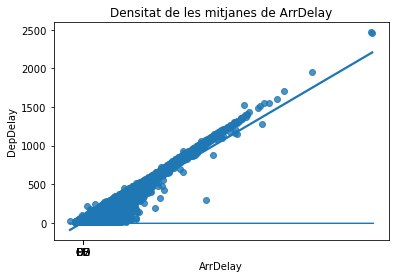

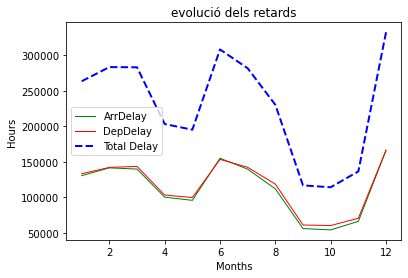

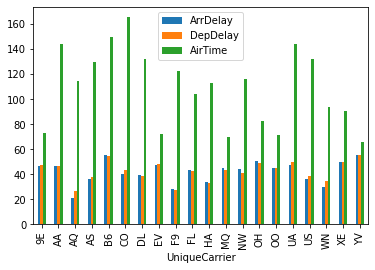

In [28]:
reload(visualitzacio_dades)